In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


### Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

    1054112
    1154112
    1254112
    1354112


In [2]:
df_jan = pd.read_parquet('data/fhv_tripdata_2021-01.parquet', engine='fastparquet')
df_feb = pd.read_parquet('data/fhv_tripdata_2021-02.parquet', engine='fastparquet')

In [3]:
init_train_len = len(df_jan.index)
init_train_len

1154112

### Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

    15.16
    19.16
    24.16
    29.16


In [4]:
df_jan['trip_time'] = (df_jan['dropOff_datetime'] - df_jan['pickup_datetime']).dt.seconds/60
df_jan['trip_time'].mean()

18.610744306736674

### Data preparation

Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

/home/oleg/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


44259

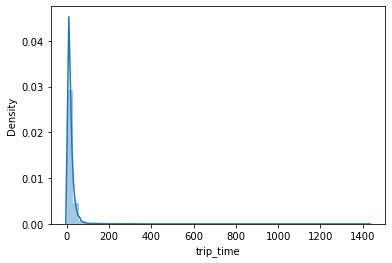

In [5]:
sns.distplot(df_jan.trip_time)

df_jan = df_jan[(df_jan['trip_time'] >= 1) & (df_jan['trip_time'] <= 60)]

init_train_len - len(df_jan.index)

/home/oleg/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_time', ylabel='Density'>

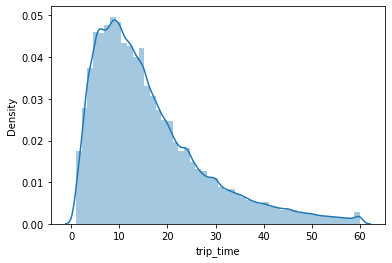

In [6]:
sns.distplot(df_jan.trip_time)

### Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

    53%
    63%
    73%
    83%


In [7]:
df_jan['PUlocationID'].fillna(-1, inplace=True)
df_jan['DOlocationID'].fillna(-1, inplace=True)
len(df_jan[df_jan['PUlocationID']==-1].index)/len(df_jan.index)

0.835275482428754

### Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

    Turn the dataframe into a list of dictionaries
    Fit a dictionary vectorizer
    Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).

    2
    152
    352
    525
    725


In [8]:
categorical = ['PUlocationID', 'DOlocationID']
df_jan[categorical] = df_jan[categorical].astype(str)
dict_jan = df_jan[categorical].to_dict('records')
dict_jan[0:10], len(dict_jan)

([{'PUlocationID': '-1.0', 'DOlocationID': '-1.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '-1.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '72.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '61.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '71.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '91.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '39.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '37.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '39.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '72.0'}],
 1109853)

In [9]:
from  sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X = dv.fit_transform(dict_jan)
X

<1109853x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219706 stored elements in Compressed Sparse Row format>

In [10]:
X.shape

(1109853, 525)

### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

What's the RMSE on train?

    5.52
    10.52
    15.52
    20.52


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y_train = df_jan['trip_time'].values
X_train = X

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528643263708359

### Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021).

What's the RMSE on validation?

    6.01
    11.01
    16.01
    21.01


In [12]:
df_feb['PUlocationID'].fillna(-1, inplace=True)
df_feb['DOlocationID'].fillna(-1, inplace=True)
df_feb[categorical] = df_feb[categorical].astype(str)

df_feb['trip_time'] = (df_feb['dropOff_datetime'] - df_feb['pickup_datetime']).dt.seconds/60
df_feb = df_feb[(df_feb['trip_time'] >= 1) & (df_feb['trip_time'] <= 60)]

dict_feb = df_feb[categorical].to_dict('records')
dict_feb[0:10], len(dict_feb)

([{'PUlocationID': '173.0', 'DOlocationID': '82.0'},
  {'PUlocationID': '173.0', 'DOlocationID': '56.0'},
  {'PUlocationID': '82.0', 'DOlocationID': '129.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '225.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '61.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '26.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '72.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '169.0'},
  {'PUlocationID': '-1.0', 'DOlocationID': '161.0'},
  {'PUlocationID': '13.0', 'DOlocationID': '182.0'}],
 990141)

In [13]:
X_test = dv.transform(dict_feb)
y_test = df_feb['trip_time'].values

y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

11.014589361640338